In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("air_quality_no2.csv", parse_dates=True)

df.head()

,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN


In [15]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["datetime"]

0      2019-05-07 02:00:00
1      2019-05-07 03:00:00
2      2019-05-07 04:00:00
3      2019-05-07 05:00:00
4      2019-05-07 06:00:00
               ...        
1030   2019-06-20 22:00:00
1031   2019-06-20 23:00:00
1032   2019-06-21 00:00:00
1033   2019-06-21 01:00:00
1034   2019-06-21 02:00:00
Name: datetime, Length: 1035, dtype: datetime64[ns]

In [19]:
df["datetime"].min(), df["datetime"].max()

(Timestamp('2019-05-07 02:00:00'), Timestamp('2019-06-21 02:00:00'))

In [20]:
df["datetime"].max() - df["datetime"].min()

Timedelta('45 days 00:00:00')

In [25]:
df.head()

,datetime,station_antwerp,station_paris,station_london,month
0,2019-05-07 02:00:00,NaN,NaN,23.0,5
1,2019-05-07 03:00:00,50.5,25.0,19.0,5
2,2019-05-07 04:00:00,45.0,27.7,19.0,5
3,2019-05-07 05:00:00,NaN,50.4,16.0,5
4,2019-05-07 06:00:00,NaN,61.9,NaN,5


KeyError: 'Column not found: value'

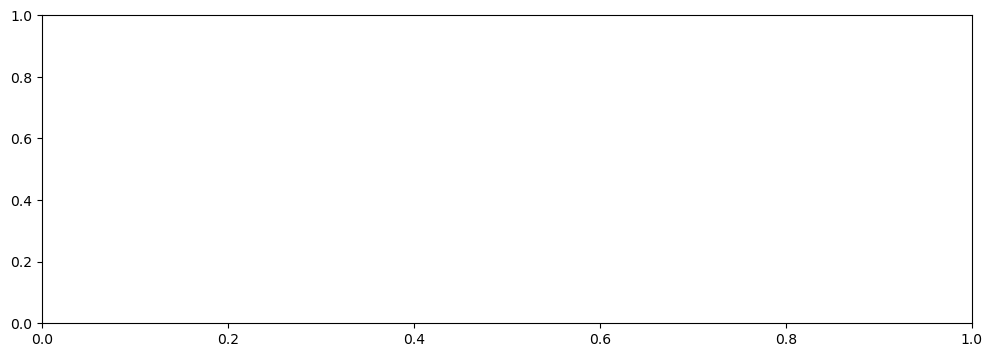

In [24]:

fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["datetime"])["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");  # custom x label using Matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");